Feedforward Neural Network on Insurance Premium Dataset

##Dataset: [Insurance Premium (OpenML ID 43463](https://www.openml.org/search?type=data&status=active&id=43463)



##Instructions & Questions


In [17]:
# impoting pandas for data analysis
import pandas as pd
# importing seaborn
import seaborn as sns
# importing seaborn for plots
import matplotlib.pyplot as plt
# importing fetch_openml to access openml dataset
from sklearn.datasets import fetch_openml
# importing the train_test_split for splitting dataset
from sklearn.model_selection import train_test_split
# importing numpy for numeric computation
import numpy as np
# importing label encoder
from sklearn.preprocessing import LabelEncoder
# importing ColumnTransformer
from sklearn.compose import ColumnTransformer
# importing StandardScalar and OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# importing itertools for creation of iteration
import itertools
# importing mse and r2 score of sklearn
from sklearn.metrics import mean_squared_error, r2_score

###Q1. Load and Inspect Dataset

Load the Insurance Premium dataset from OpenML. Check for: Missing features and duplicate entries.

In [18]:
# Loading dataset from OpenML
data = fetch_openml(data_id=43463, as_frame=True)

# Extracting dataframe
df = data.frame

# Display first 5 rows
print("First 5 rows of dataset:")
print(df.head())

# printing Shape of dataset
print("\nShape of dataset:", df.shape)

# Checking for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Checking for duplicate entries
print("\nNumber of duplicate entries:", df.duplicated().sum())

First 5 rows of dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Shape of dataset: (1338, 7)

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Number of duplicate entries: 1


In [19]:
# droping the duplicates
df = df.drop_duplicates()

# cheking again for no. of duplicate rows after removal
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [20]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [21]:
# describing the daatframe
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


###Q2. Dataset Splitting

Split the dataset into train (70%), validation (15%), and test (15%).

In [22]:
# Splitting Features (X) and target (y)
# 'charges' is the target (insurance premium)
X = df.drop(columns=["charges"])
y = df["charges"]

# Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Validation (15%) and Test (15%) while got after split X_temp into 50-50
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

# Printing sizes
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (935, 6) (935,)
Validation set: (201, 6) (201,)
Test set: (201, 6) (201,)


###Q3. Feature Preprocessing

Perform feature scaling (e.g., MinMax scaling or Standardization) so all numerical features are in the same range. Encode categorical features like region using One-Hot Encoding.

In [23]:
# Separate features and target again
X = df.drop(columns=["charges"])
y = df["charges"]

# Identifying column types
# numerical columns
numFeatures = ["age", "bmi", "children"]
# categorical columns
catFeatures = ["sex", "smoker", "region"]

# Preprocessor scaling numerical, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numFeatures),
        ("cat", OneHotEncoder(drop="first"), catFeatures)
    ]
)

# Fit and transform training data
X_trainPrep = preprocessor.fit_transform(X_train)
X_valPrep   = preprocessor.transform(X_val)
X_testPrep  = preprocessor.transform(X_test)

# printing shapes
print("Transformed training set shape:", X_trainPrep.shape)
print("Transformed validation set shape:", X_valPrep.shape)
print("Transformed test set shape:", X_testPrep.shape)

Transformed training set shape: (935, 8)
Transformed validation set shape: (201, 8)
Transformed test set shape: (201, 8)


###Q4. Implement Feedforward Neural Network

1. Implement a feedforward neural network from scratch (NumPy).
2. Use number of hidden layers and neurons per layer as hyperparameters.
3. Use MSE as the loss function.
4. Train using Mini-batch Gradient Descent.
5. Choose a suitable learning rate and batch size.

In [24]:
# Feedforward Neural Network from scratch (NumPy)
# ReLU activation function returns the input if it's positive otherwise returns 0
def relu(Z):
    return np.maximum(0, Z)

# Derivative of ReLU returns 1 for positive inputs 0 otherwise
def reluDerivative(Z):
    return (Z > 0).astype(float)

# Mean Squared Error (MSE) loss function measures the average squared difference between predictions and true values
def mseLoss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Derivative of MSE loss with respect to predictions: used during backpropagation to update weights
def mseDerivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / y_true.shape[0]

# Neural Network Class
class FeedforwardNN:
    def __init__(self, inputDim, hiddenLayers=[32, 16], lr=0.001, seed=42):
        # For reproducibility
        np.random.seed(seed)
        # learning rate
        self.lr = lr
        # list to store weights and biases for each layer
        self.layers = []

        # output layer = 1 neuron (regression)
        # Define layer dimensions: input -> hidden layers -> output (1 neuron for regression)
        layerDims = [inputDim] + hiddenLayers + [1]

        # Initialize weights and biases using Xavier initialization
        for i in range(len(layerDims)-1):
            W = np.random.randn(layerDims[i], layerDims[i+1]) * np.sqrt(2 / layerDims[i])
            b = np.zeros((1, layerDims[i+1]))
            self.layers.append({"W": W, "b": b})

    def forward(self, X):
        # Stores activations and pre-activations for backprop
        cache = []
        # initial input
        A = X
        for i in range(len(self.layers)):
            W, b = self.layers[i]["W"], self.layers[i]["b"]
            Z = np.dot(A, W) + b
            # Apply ReLU for hidden layers, linear for output
            if i < len(self.layers)-1:
                A = relu(Z)
            else:
                # output layer = linear
                A = Z
            # Store both activation and pre-activation
            cache.append((A, Z))
        return A, cache

    def backward(self, X, y, cache):
        # Number of samples
        m = X.shape[0]
        grads = [None] * len(self.layers)

        # Compute gradient of loss w.r.t. output
        A_last, Z_last = cache[-1]
        dA = mseDerivative(y, A_last)

        # Backpropagate through layers
        for i in reversed(range(len(self.layers))):
            A_prev = X if i == 0 else cache[i-1][0]
            W, b = self.layers[i]["W"], self.layers[i]["b"]

            # Compute dZ based on activation function
            if i == len(self.layers)-1:
                dZ = dA
            else:
                dZ = dA * reluDerivative(cache[i][1])

            # Gradients for weights and biases
            dW = np.dot(A_prev.T, dZ)
            db = np.sum(dZ, axis=0, keepdims=True)
            # Propagate gradient to previous layer
            dA = np.dot(dZ, W.T)

            grads[i] = {"dW": dW, "db": db}

        return grads

    def updateParams(self, grads):
        for i in range(len(self.layers)):
            # Gradient clipping to prevent explosion
            self.layers[i]["W"] -= self.lr * np.clip(grads[i]["dW"], -1, 1)
            self.layers[i]["b"] -= self.lr * np.clip(grads[i]["db"], -1, 1)

    def fit(self, X, y, epochs=100, batchSize=32):
        # Ensure y is column vector
        y = y.reshape(-1, 1)
        losses = []
        for epoch in range(epochs):
            # Shuffle data for each epoch mini-batch
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)

            # Mini-batch training
            for start in range(0, X.shape[0], batchSize):
                end = start + batchSize
                batchIdx = indices[start:end]
                X_batch, y_batch = X[batchIdx], y[batchIdx]

                # Forward and backward pass
                y_pred, cache = self.forward(X_batch)
                grads = self.backward(X_batch, y_batch, cache)
                self.updateParams(grads)

            # Track loss on full training set
            y_predFull, _ = self.forward(X)
            loss = mseLoss(y.reshape(-1,1), y_predFull)
            losses.append(loss)

            # Print progress every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")
        return losses

    def predict(self, X):
        y_pred, _ = self.forward(X)
        return y_pred

# Training the model
# Convert preprocessed datasets to numpy arrays
if hasattr(X_trainPrep, "toarray"):
  X_train_np = X_trainPrep.toarray()
else:
  X_trainPrep
if hasattr(X_valPrep, "toarray"):
  X_val_np   = X_valPrep.toarray()
else:
  X_valPrep
if hasattr(X_testPrep, "toarray"):
  X_test_np  = X_testPrep.toarray()
else:
  X_testPrep

y_train_np = y_train.values
y_val_np   = y_val.values
y_test_np  = y_test.values

# Initialize and train model
model = FeedforwardNN(inputDim=X_train_np.shape[1], hiddenLayers=[32,16], lr=0.001)
losses = model.fit(X_train_np, y_train_np, epochs=100, batchSize=32)

# Predictions
y_predTrain = model.predict(X_train_np)
y_predVal = model.predict(X_val_np)
y_predTest = model.predict(X_test_np)

# Final Loss
print("Final Training Loss:", mseLoss(y_train_np.reshape(-1,1), y_predTrain))
print("Validation Loss:", mseLoss(y_val_np.reshape(-1,1), y_predVal))
print("Test Loss:", mseLoss(y_test_np.reshape(-1,1), y_predTest))


Epoch 0: Loss = 305665410.5284
Epoch 10: Loss = 304110280.6805
Epoch 20: Loss = 297407384.0442
Epoch 30: Loss = 281470365.5712
Epoch 40: Loss = 253464038.2922
Epoch 50: Loss = 213228071.7123
Epoch 60: Loss = 165327099.0641
Epoch 70: Loss = 121476744.8834
Epoch 80: Loss = 98589703.3130
Epoch 90: Loss = 91346592.1035
Final Training Loss: 86064598.57226095
Validation Loss: 107735976.91597636
Test Loss: 102153371.58193547


###Q5. Hyperparameter Tuning

Tune the number of hidden layers and neurons per layer on the validation set.
Try the following combinations:
1. Neurons in a layer: [32,64,128]
2. Number of hidden layers: [2,3]

Pick learning rate and batch size as per your choice.

In [25]:
# Define possible neuron counts per hidden layer
neuronsOptions = [32, 64, 128]

# Define possible numbers of hidden layers
hiddenLayersOptions = [2, 3]

# Set learning rate
lr = 0.001

# Set mini-batch size
batchSize = 32

# Set number of training epochs (reduced for faster tuning)
epochs = 50

# Convert training features to dense numpy arrays if they are sparse
if hasattr(X_trainPrep, "toarray"):
  X_train_np = X_trainPrep.toarray()
else:
  X_trainPrep

# Convert validation features to dense numpy arrays if they are sparse
if hasattr(X_valPrep, "toarray"):
  X_val_np = X_valPrep.toarray()
else:
  X_valPrep

# Convert training labels to numpy arrays
y_train_np = y_train.values

# Convert validation labels to numpy arrays
y_val_np = y_val.values

# Initialize list to store results for each configuration
results = []

# Loop over each number of hidden layers
for numLayers in hiddenLayersOptions:

    # Loop over each neuron count
    for neurons in neuronsOptions:

        # Create architecture same number of neurons in each hidden layer
        hiddenLayers = [neurons] * numLayers

        # Print current configuration
        print(f"\nTraining with {numLayers} hidden layers, {neurons} neurons per layer")

        # Initialize model with current architecture
        model = FeedforwardNN(inputDim=X_train_np.shape[1],
                              hiddenLayers=hiddenLayers,
                              lr=lr)

        # Train the model
        model.fit(X_train_np, y_train_np, epochs=epochs, batchSize=batchSize)

        # Predict on validation set
        y_valPred = model.predict(X_val_np)

        # Compute validation loss
        valLoss = mseLoss(y_val_np.reshape(-1,1), y_valPred)

        # Print validation loss
        print(f"Validation Loss: {valLoss:.2f}")

        # Store results for current configuration
        results.append({
            "hiddenLayers": numLayers,
            "neurons": neurons,
            "valLoss": valLoss
        })

# Find configuration with lowest validation loss
best = min(results, key=lambda x: x["valLoss"])

# Print best hyperparameter combination
print("\nBest Hyperparameters:")
print(f"Hidden Layers: {best['hiddenLayers']}, Neurons: {best['neurons']}, Validation Loss: {best['valLoss']:.2f}")



Training with 2 hidden layers, 32 neurons per layer
Epoch 0: Loss = 305634506.3340
Epoch 10: Loss = 302411606.0674
Epoch 20: Loss = 288096560.6782
Epoch 30: Loss = 255179968.7837
Epoch 40: Loss = 202325002.3176
Validation Loss: 194271907.88

Training with 2 hidden layers, 64 neurons per layer
Epoch 0: Loss = 305570466.3911
Epoch 10: Loss = 295761200.7256
Epoch 20: Loss = 252267627.6398
Epoch 30: Loss = 167730913.8623
Epoch 40: Loss = 99911978.6292
Validation Loss: 108194497.94

Training with 2 hidden layers, 128 neurons per layer
Epoch 0: Loss = 305261061.1667
Epoch 10: Loss = 268554750.0380
Epoch 20: Loss = 144508074.1136
Epoch 30: Loss = 90238456.2154
Epoch 40: Loss = 74172045.8588
Validation Loss: 74953124.50

Training with 3 hidden layers, 32 neurons per layer
Epoch 0: Loss = 305492857.7337
Epoch 10: Loss = 268650956.9011
Epoch 20: Loss = 109123516.7047
Epoch 30: Loss = 84674058.3622
Epoch 40: Loss = 65418580.6873
Validation Loss: 64003308.50

Training with 3 hidden layers, 64 neu

###Q6. Training & Validation Curves

For the best hyperparameters, plot the training and validation loss vs. epochs.

Epoch 0: Training Loss = 304609706.67, Validation Loss = 375604822.22
Epoch 10: Training Loss = 92461148.76, Validation Loss = 113932719.62
Epoch 20: Training Loss = 48771350.39, Validation Loss = 59952020.52
Epoch 30: Training Loss = 32364821.51, Validation Loss = 37970261.92
Epoch 40: Training Loss = 28633653.02, Validation Loss = 33063160.17
Epoch 50: Training Loss = 25406406.89, Validation Loss = 29702635.56
Epoch 60: Training Loss = 22792842.98, Validation Loss = 26588594.51
Epoch 70: Training Loss = 21480018.45, Validation Loss = 25421308.61
Epoch 80: Training Loss = 20871967.86, Validation Loss = 24688591.97
Epoch 90: Training Loss = 20243641.70, Validation Loss = 23808965.57


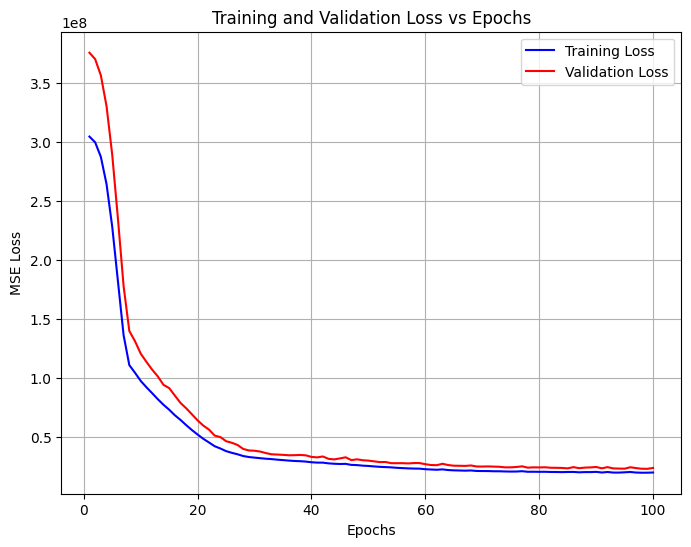

In [26]:
# Set best hyperparameters based on tuning results
bestHiddenLayers = [128, 128, 128]

# Set learning rate
lr = 0.001

# Set mini-batch size
batchSize = 32

# Set number of training epochs (increased for smoother loss curves)
epochs = 100

# Initialize the feedforward neural network with chosen architecture
model = FeedforwardNN(inputDim=X_train_np.shape[1],
                      hiddenLayers=bestHiddenLayers,
                      lr=lr)

# Initialize lists to store training and validation loss for each epoch
trainLosses = []
valLosses = []

# Reshape training labels to column vector
y_train_npReshaped = y_train_np.reshape(-1,1)

# Reshape validation labels to column vector
y_val_npReshaped = y_val_np.reshape(-1,1)

# Loop over each epoch
for epoch in range(epochs):

    # Shuffle training data indices for mini-batch sampling
    indices = np.arange(X_train_np.shape[0])
    np.random.shuffle(indices)

    # Loop over mini-batches
    for start in range(0, X_train_np.shape[0], batchSize):
        end = start + batchSize
        batchIdx = indices[start:end]

        # Extract mini-batch data
        X_batch = X_train_np[batchIdx]
        y_batch = y_train_npReshaped[batchIdx]

        # Forward pass on mini-batch
        y_predBatch, cache = model.forward(X_batch)

        # Backward pass to compute gradients
        grads = model.backward(X_batch, y_batch, cache)

        # Update model parameters using gradients
        model.updateParams(grads)

    # Compute training loss on full dataset
    y_trainPred, _ = model.forward(X_train_np)
    trainLoss = mseLoss(y_train_npReshaped, y_trainPred)

    # Store training loss
    trainLosses.append(trainLoss)

    # Compute validation loss on full validation set
    y_valPred, _ = model.forward(X_val_np)
    valLoss = mseLoss(y_val_npReshaped, y_valPred)

    # Store validation loss
    valLosses.append(valLoss)

    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Training Loss = {trainLoss:.2f}, Validation Loss = {valLoss:.2f}")

# Create a new figure for plotting loss curves
plt.figure(figsize=(8,6))

# Plot training loss curve
plt.plot(range(1, epochs+1), trainLosses, label="Training Loss", color="blue")

# Plot validation loss curve
plt.plot(range(1, epochs+1), valLosses, label="Validation Loss", color="red")

# Label x-axis as epochs
plt.xlabel("Epochs")

# Label y-axis as MSE loss
plt.ylabel("MSE Loss")

# Add title to the plot
plt.title("Training and Validation Loss vs Epochs")

# Display legend to differentiate curves
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


###Q7. Model Evaluation – Custom NN

1. On the test set, report MSE and R² Score, round predictions to nearest integers.

2. Show a scatter plot of predictions vs ground truth targets.

Test MSE (rounded predictions): 24476716.80
Test R² Score (rounded predictions): 0.8566


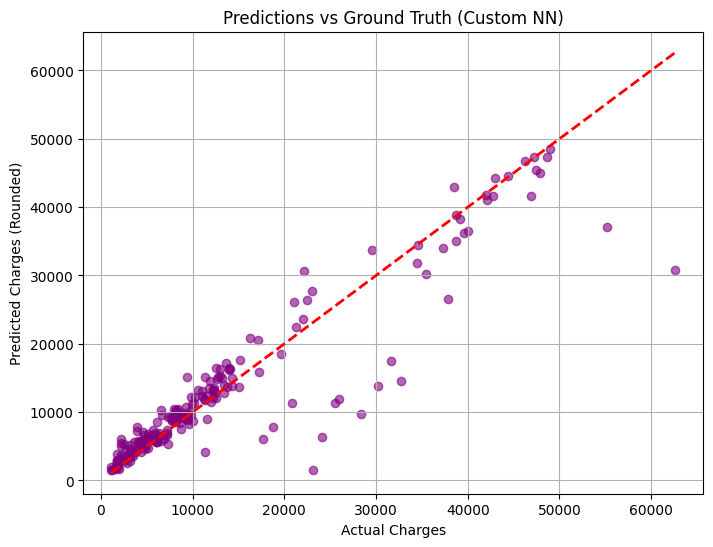

In [27]:
# Generate predictions on the test set using the trained model
y_testPred = model.predict(X_test_np)

# Round predictions to the nearest integer for evaluation
y_testPredRounded = np.rint(y_testPred)

# Calculate Mean Squared Error between actual and rounded predicted values
testMse = mean_squared_error(y_test_np, y_testPredRounded)

# Display the test MSE
print(f"Test MSE (rounded predictions): {testMse:.2f}")

# Calculate R² score to measure goodness of fit
test_r2 = r2_score(y_test_np, y_testPredRounded)

# Display the test R² score
print(f"Test R² Score (rounded predictions): {test_r2:.4f}")

# Create a new figure for the scatter plot
plt.figure(figsize=(8,6))

# Plot actual vs predicted values as purple dots
plt.scatter(y_test_np, y_testPredRounded, color='purple', alpha=0.6)

# Plot reference line (perfect prediction line)
plt.plot([y_test_np.min(), y_test_np.max()],
         [y_test_np.min(), y_test_np.max()],
         'r--', linewidth=2)

# Label x-axis as actual values
plt.xlabel("Actual Charges")

# Label y-axis as predicted values
plt.ylabel("Predicted Charges (Rounded)")

# Add title to the plot
plt.title("Predictions vs Ground Truth (Custom NN)")

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()


###Q8. Sklearn MLPRegressor

1. Train MLPRegressor with the same hyperparameters and report test set performance
(MSE, R² Score).
2. Compare its performace with custom NN.
3. Show scatter plot of predictions vs ground truths.

MLPRegressor Test MSE (rounded predictions): 23775418.69
MLPRegressor Test R² Score (rounded predictions): 0.8607
Comparison: Custom NN vs Sklearn MLPRegressor
Model          Test MSE            R² Score  
Custom NN      24476716.80         0.8566    
MLPRegressor   23775418.69         0.8607    


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


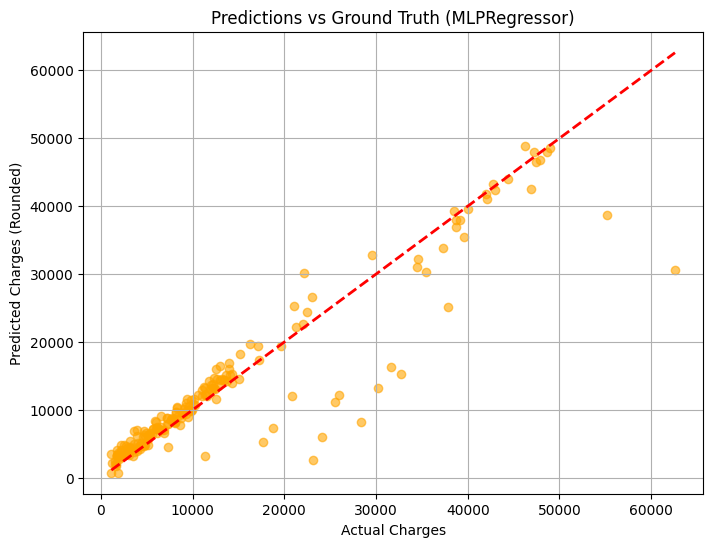

In [28]:
# Import MLPRegressor from scikit-learn
from sklearn.neural_network import MLPRegressor

# Initialize MLPRegressor with architecture and hyperparameters similar to your custom model
mlp = MLPRegressor(hidden_layer_sizes=(128,128,128),  # Three hidden layers with 128 neurons each
                   activation='relu',                 # ReLU activation function
                   solver='adam',                     # Adam optimizer for efficient training
                   learning_rate_init=0.001,          # Initial learning rate
                   max_iter=200,                      # Maximum number of iterations
                   batch_size=32,                     # Mini-batch size
                   random_state=42)                   # Seed for reproducibility


# Train the model on the training dataset
mlp.fit(X_train_np, y_train_np.ravel())  # Flatten y to 1D array as required by scikit-learn

# Predict target values on the test dataset
y_testPredSkl = mlp.predict(X_test_np)

# Round predicted values to the nearest integer
y_testPredSklRounded = np.rint(y_testPredSkl)

# Calculate Mean Squared Error between actual and rounded predicted values
testMseSkl = mean_squared_error(y_test_np, y_testPredSklRounded)

# Print the test MSE
print(f"MLPRegressor Test MSE (rounded predictions): {testMseSkl:.2f}")

# Calculate R² score to evaluate model performance
test_r2Skl = r2_score(y_test_np, y_testPredSklRounded)

# Print the test R² score
print(f"MLPRegressor Test R² Score (rounded predictions): {test_r2Skl:.4f}")

# comparison table
print("Comparison: Custom NN vs Sklearn MLPRegressor")
print(f"{'Model':<15}{'Test MSE':<20}{'R² Score':<10}")
print(f"{'Custom NN':<15}{testMse:<20.2f}{test_r2:<10.4f}")
print(f"{'MLPRegressor':<15}{testMseSkl:<20.2f}{test_r2Skl:<10.4f}")

# Create a new figure for the scatter plot
plt.figure(figsize=(8,6))

# Plot actual vs predicted values as orange dots
plt.scatter(y_test_np, y_testPredSklRounded, color='orange', alpha=0.6)

# Plot reference line indicating perfect predictions
plt.plot([y_test_np.min(), y_test_np.max()],
         [y_test_np.min(), y_test_np.max()],
         'r--', linewidth=2)

# Label x-axis as actual values
plt.xlabel("Actual Charges")

# Label y-axis as predicted values
plt.ylabel("Predicted Charges (Rounded)")

# Add title to the plot
plt.title("Predictions vs Ground Truth (MLPRegressor)")

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()


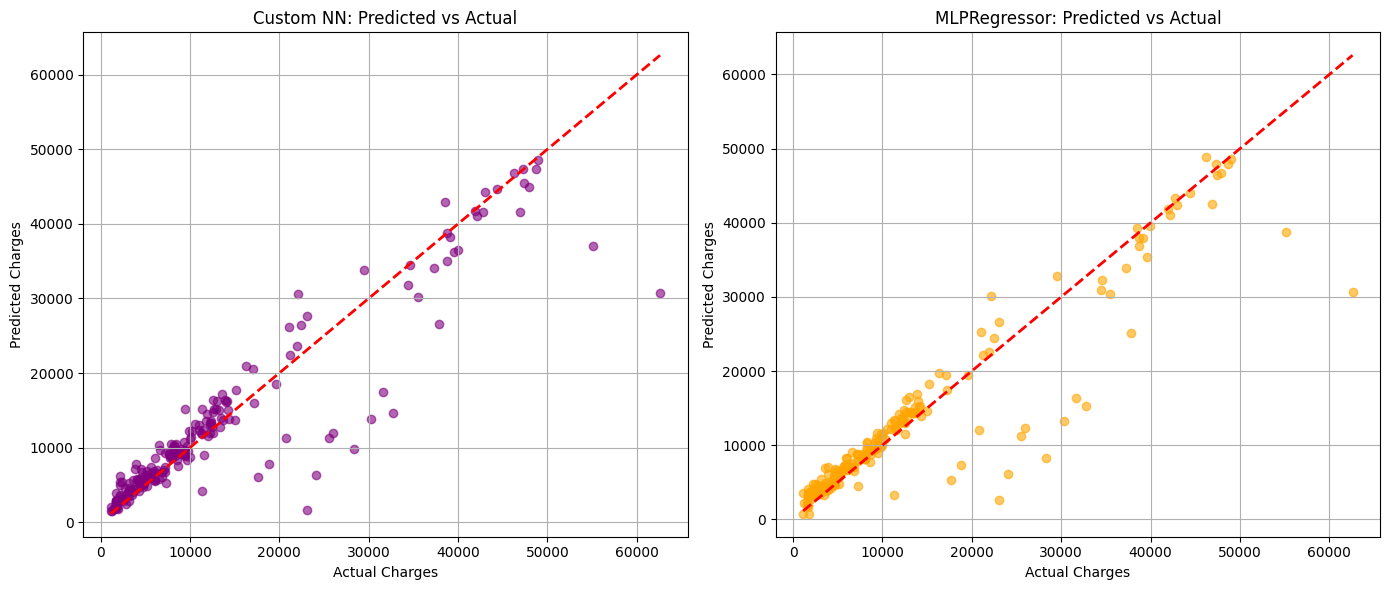

In [29]:
plt.figure(figsize=(14,6))
# Custom Neural Network Plot
# Create subplot in position 1 of a 1x2 grid
plt.subplot(1,2,1)

# Plot actual vs predicted values from custom NN as purple dots
plt.scatter(y_test_np, y_testPredRounded, color='purple', alpha=0.6)

# Plot reference line indicating perfect predictions
plt.plot([y_test_np.min(), y_test_np.max()],
         [y_test_np.min(), y_test_np.max()],
         'r--', linewidth=2)

# Label x-axis as actual values
plt.xlabel("Actual Charges")

# Label y-axis as predicted values
plt.ylabel("Predicted Charges")

# Add title to the subplot
plt.title("Custom NN: Predicted vs Actual")

# Add grid for better readability
plt.grid(True)

# Scikit-learn MLPRegressor Plot
# Create subplot in position 2 of a 1x2 grid
plt.subplot(1,2,2)

# Plot actual vs predicted values from MLPRegressor as orange dots
plt.scatter(y_test_np, y_testPredSklRounded, color='orange', alpha=0.6)

# Plot reference line indicating perfect predictions
plt.plot([y_test_np.min(), y_test_np.max()],
         [y_test_np.min(), y_test_np.max()],
         'r--', linewidth=2)

# Label x-axis as actual values
plt.xlabel("Actual Charges")

# Label y-axis as predicted values
plt.ylabel("Predicted Charges")

# Add title to the subplot
plt.title("MLPRegressor: Predicted vs Actual")

# Add grid for better readability
plt.grid(True)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the figure with both subplots
plt.show()
